In [2]:
import os
os.chdir("..")

[0.9195247  0.86391007 0.85975666 0.81731238 0.91286697 0.95394524
 0.95801086]


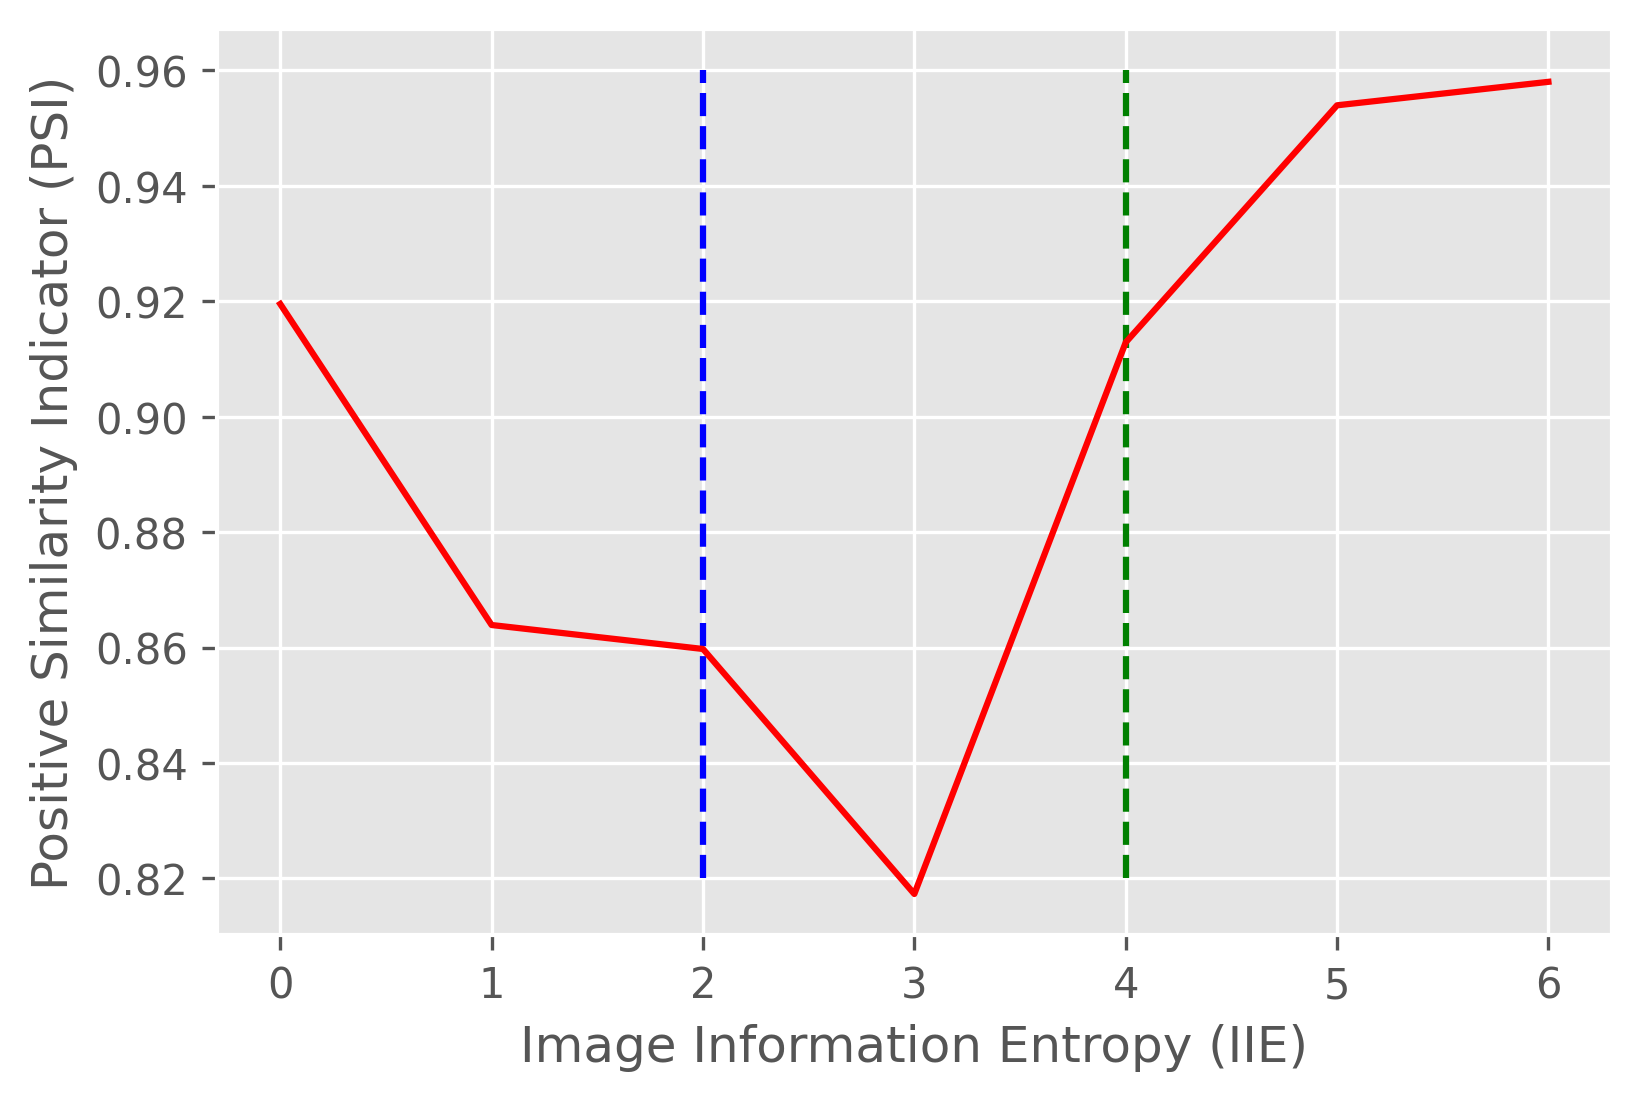

In [4]:
%matplotlib inline
import random
import numpy as np
from sc.ssl2.ssl_probmap7 import *
from utils.tester.tester_gtv import Tester
# from tutils import print_dict
import matplotlib
# matplotlib.use('Agg')  # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def reproducibility(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.autograd.set_detect_anomaly(True)


reproducibility(0)
# fig = plt.figure()
fig, ax = plt.subplots(dpi=300)
# ax2 = ax.twinx()
fig.set_figwidth(6)
fig.set_figheight(4)

switch = False
pths = []
pths += ['baseline_ps64_3']
length = np.array([1,1,1,1,1,1])
for pth in pths:
    epochs = [450]
    for epoch in epochs:
        data_path = f"./tmp/tester_gtv3/ssl_{pth}_gtv1_epoch_{epoch}.npy"
        res1 = np.load(data_path)
        print(res1)
        # import ipdb; ipdb.set_trace()
        ax.plot(np.arange(0,7), res1, label="PSI", color="red")

# pths += ['baseline_ps64_3']
# for pth in pths:
#     epochs = [450]
#     for epoch in epochs:
#         data_path = f"./tmp/tester_gtv4/ssl_{pth}_gtv_epoch_{epoch}.npy"
#         res1 = np.load(data_path)
#         print(res1)
#         ax2.plot(np.arange(0,1), res1[0:1], label=f"PSI")
#         ax2.plot(np.arange(0,7), res1, label=f"DDI", color="green")

# ax2.legend(loc='upper left')
# ax.legend()
ax.set_xlabel("Image Information Entropy (IIE)")
ax.set_ylabel("Positive Similarity Indicator (PSI)")
# ax2.set_ylabel("DDI")
plt.vlines([2], 0.82, 0.96, linestyles='dashed', colors='blue')
plt.vlines([4], 0.82, 0.96, linestyles='dashed', colors='green')
plt.savefig("paper_fig2.png")
plt.savefig("paper_fig2.pdf")
plt.show()

